In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [78]:
# Open data
tracks = pd.read_csv("data/tracks.csv")

In [79]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [14]:
tracks.loc[:5, ["name", "popularity"]]

,name,popularity
0,Carve,6
1,Capítulo 2.16 - Banquero Anarquista,0
2,Vivo para Quererte - Remasterizado,0
3,El Prisionero - Remasterizado,0
4,Lady of the Evening,0
5,Ave Maria,0


In [58]:
songinput = widgets.Text(
    #value='Hello World',
    #placeholder='Title',
    description='Song title:',
    disabled=False
)

artistinput = widgets.Text(
    value="",
    placeholder='Optional',
    description='Artist:',
    disabled=False
)

display(songinput, artistinput)

Text(value='', description='Song title:')

Text(value='', description='Artist:', placeholder='Optional')

Multiple artists found, please refine results.


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
74442,2DlHlPMa4M17kufBvI2lEN,chop suey!,81,210240,0,['system of a down'],['5eAWCfyUhZtHHtBdNk56l1'],2001-09-04,0.417,0.934,7,-3.908,0,0.119,0.000278,0.0015,0.132,0.287,127.066,4
378481,4GIkc2oLkb5jlfbHJXoJpC,chop suey!,45,210253,0,['system of a down'],['5eAWCfyUhZtHHtBdNk56l1'],1999,0.413,0.933,7,-3.912,0,0.127,0.000365,0.0023,0.121,0.325,127.202,4


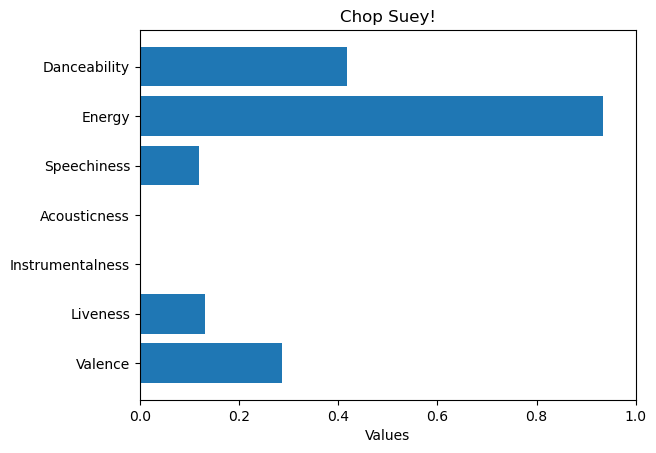

In [133]:
# Pre-process data
# Lower input
name = songinput.value.lower()
artist = artistinput.value.lower()

# Lower track names
lowernames = tracks["name"]
lowernames = lowernames.str.lower()
tracks["name"] = lowernames

# Lower artist names
lowerartists = tracks["artists"]
lowerartists = lowerartists.str.lower()
tracks["artists"] = lowerartists

# Search query
songresults = tracks[tracks["name"] == name]
    
# Check artist count
if len(songresults["artists"]) > 1:
    print("Multiple artists found, please refine results.")

display(songresults.head())
    
# Plot spotify metrics
fig, ax = plt.subplots()

stats = ('Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence')
values = songresults.loc[:, ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
values = values.iloc[0]
name = songresults.iloc[0, 1]

ax.barh(stats, values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Values')
ax.set_xlim(left=0.0, right=1.0)
ax.set_title(name.title())

plt.show()

In [ ]:
values = songresults.loc[:, ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
values = values.iloc[0]
values.head()
name = songresults.iloc[0, 1]
print(name)